Capstone Two Data Wrangling
E Commerce Delivery Performance Prediction

Goal
Predict whether an order will be delivered on time

Unit of analysis
Each row is one shipped order

Target variable
Reached.on.Time_Y.N

In [10]:
import pandas as pd

df = pd.read_csv("Train.csv")

df.shape
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


The dataset contains 10999 shipped orders and 12 features. Warehouse block, shipment mode, product importance, and gender are categorical. Weight, cost, discount, prior purchases, customer rating, and customer care calls are numeric. Reached.on.Time_Y.N is the binary target variable.

In [12]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

There are no missing values in any columns. 
Therefore no imputation or row removal was required.

In [13]:
df.describe(include="all")

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [14]:
df.duplicated().sum()

0

No duplicate orders were found so no rows were removed.

In [15]:
df[df["Weight_in_gms"] <= 0]
df[df["Cost_of_the_Product"] <= 0]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


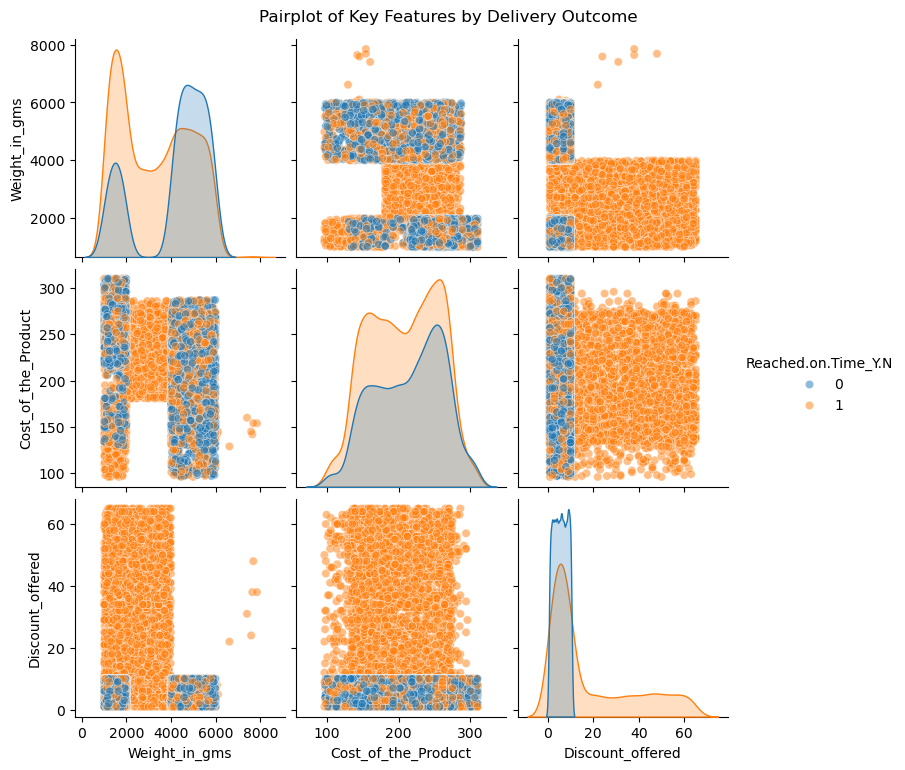

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
    "Weight_in_gms",
    "Cost_of_the_Product",
    "Discount_offered",
    "Reached.on.Time_Y.N"
]

sns.pairplot(
    df[cols],
    hue="Reached.on.Time_Y.N",
    diag_kind="kde",
    plot_kws={"alpha": 0.5}
)

plt.suptitle("Pairplot of Key Features by Delivery Outcome", y=1.02)
plt.show()

In [17]:
df["Reached.on.Time_Y.N"].value_counts(normalize=True)

Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64

In [18]:
df.to_csv("cleaned_shipping_data.csv", index=False)